In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('heart.csv')

# EDA and Preprocessing

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.shape

# There are 918 rows and 12 columns

(918, 12)

In [5]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

There are 5 categorical features and 6 Numerical independent features and HeartDisease is our Dependent  feature  

In [6]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There are No Missing Values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


1. The dataset is about people of age in the range of 28-77
2. 132 is the Average value of RestingBp.
3. Cholesterol of given people is in between 0-603.

In [9]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

1. ChestPainType are of 4 types
2. FastingBS,RestingECG are given in Categories instead of Numeric value
3. HeartDisease is the target variable with yes or no value.

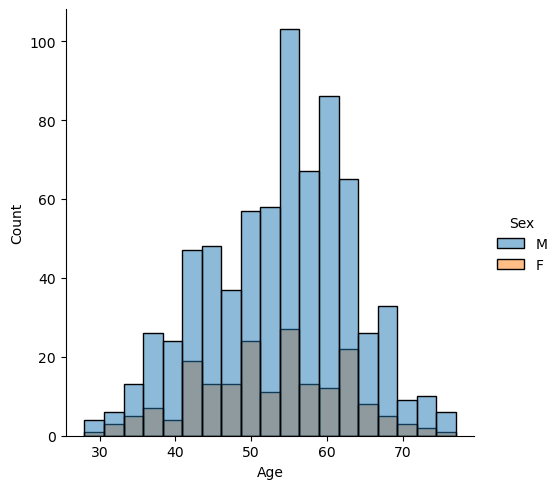

In [10]:
sns.displot(x=df['Age'],hue=df['Sex'])

1. Data has more records of males than females.
2. Majority records are of people aged between 50 to 65 years.

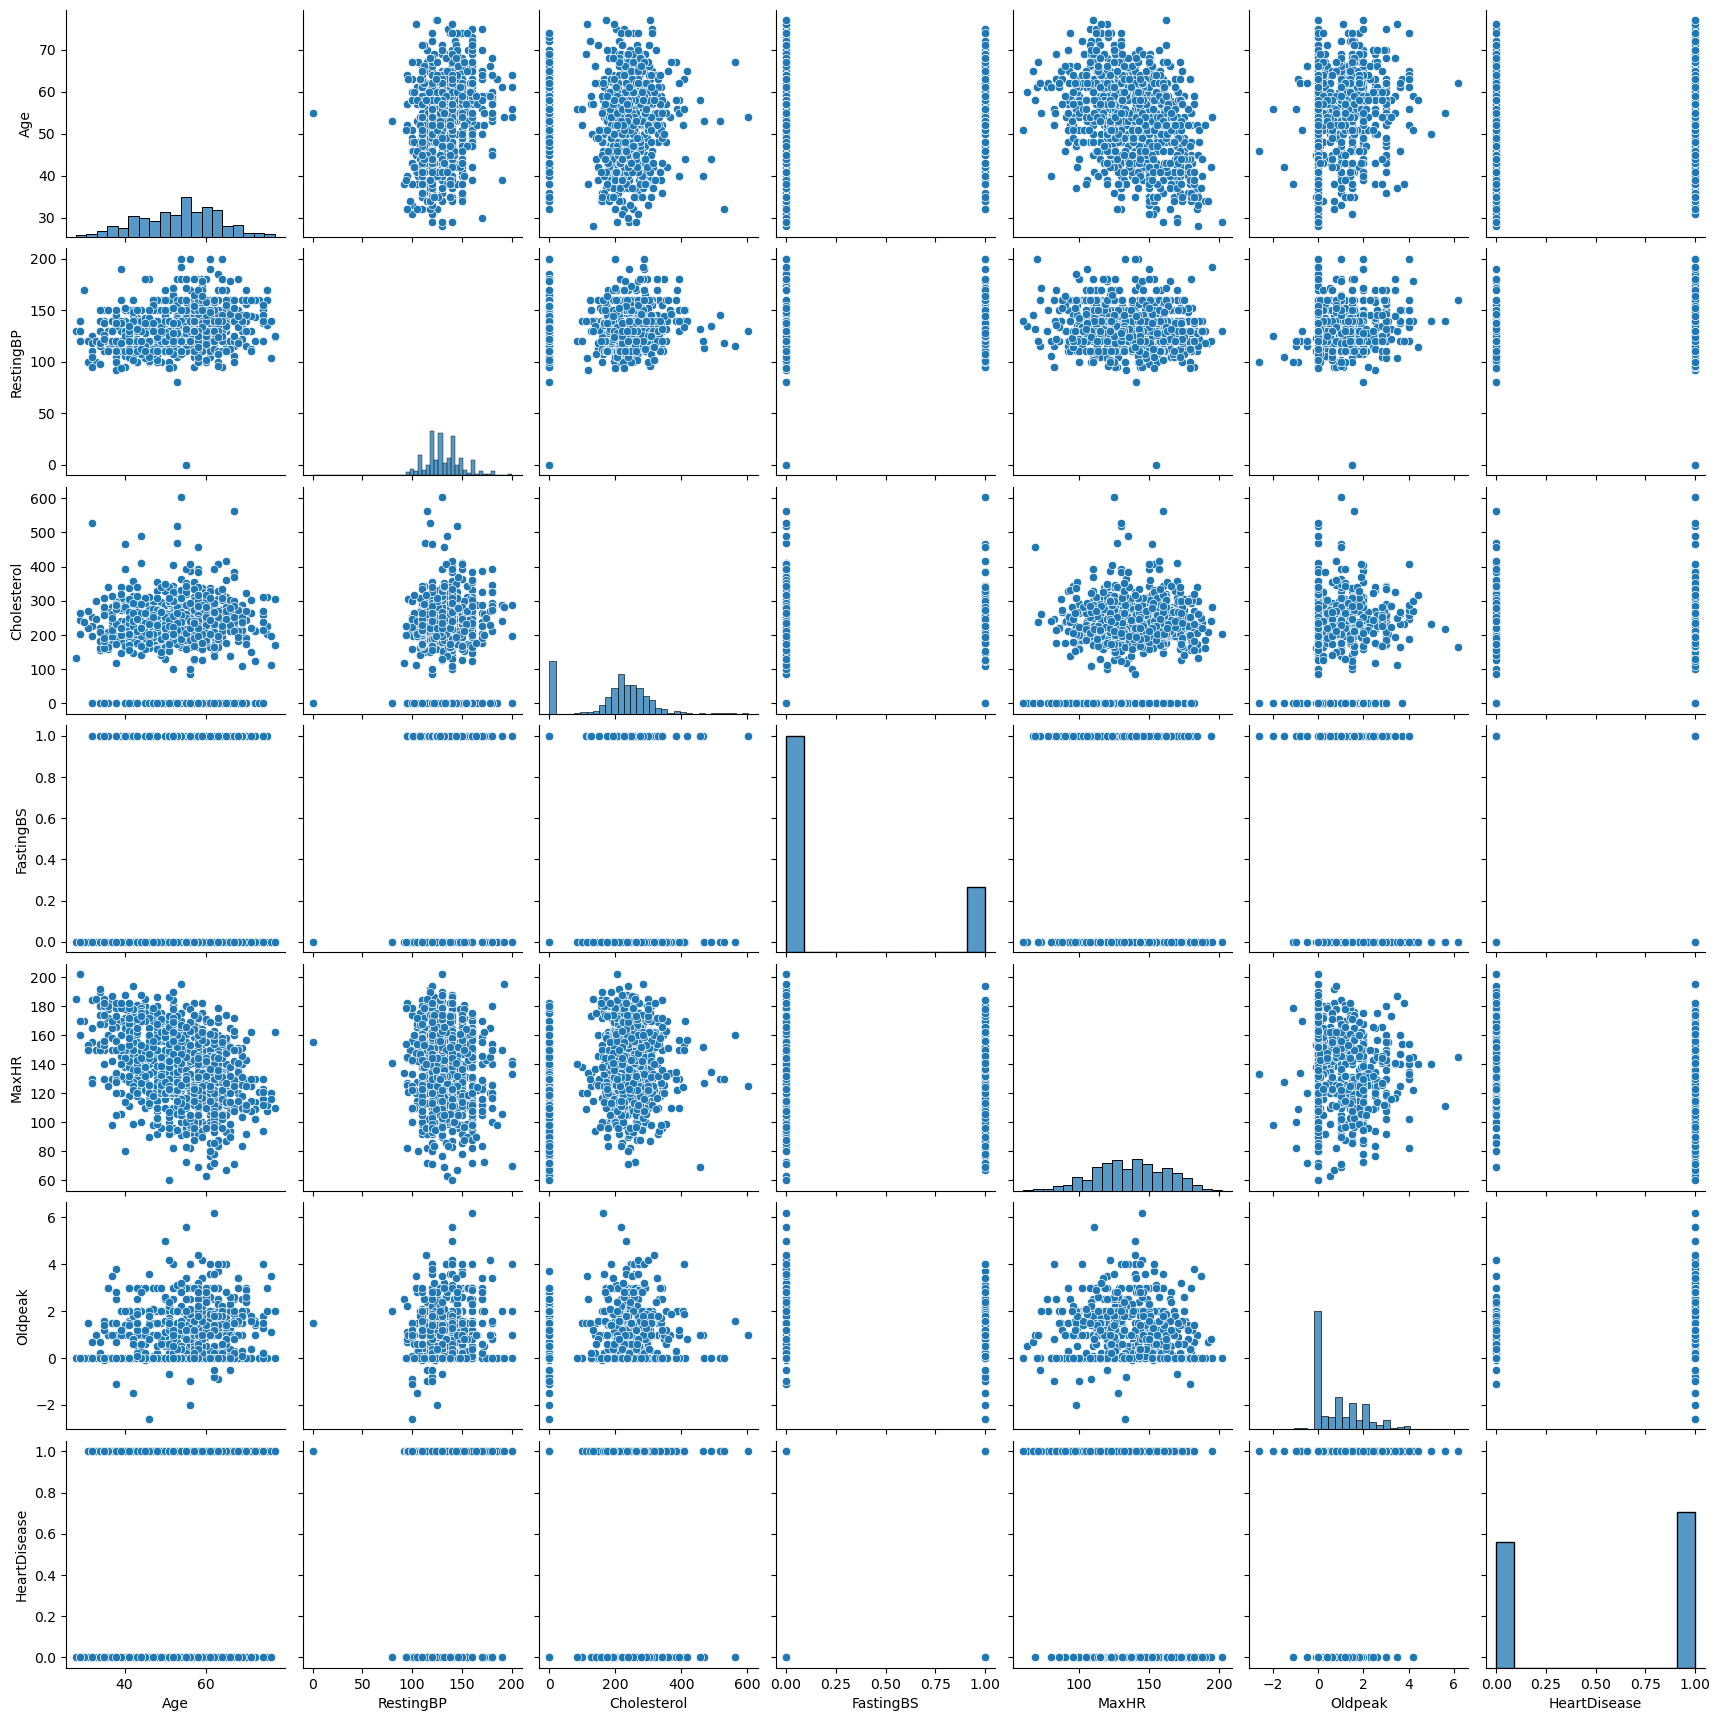

In [11]:
sns.pairplot(df)

1. Oldpeak feature is right skewed and rest are almost in normal range.
2. Overall data seems to be Linear

<Axes: ylabel='Age'>

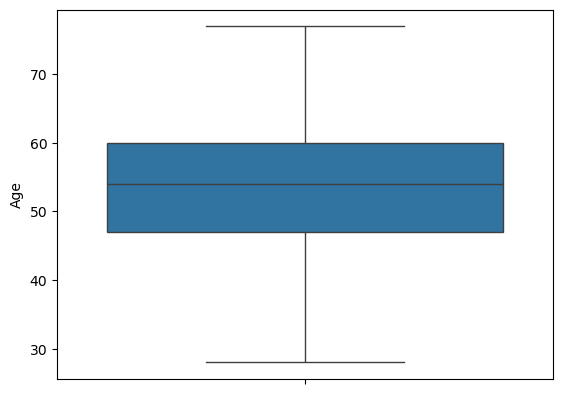

In [12]:
sns.boxplot(df['Age'])

Age column is in normal range , there is no outlier

<Axes: ylabel='RestingBP'>

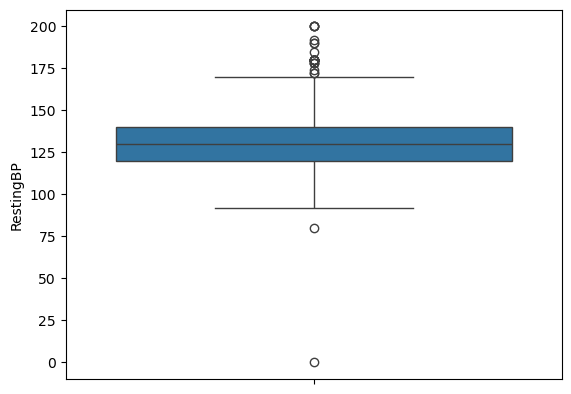

In [13]:
sns.boxplot(df['RestingBP'])

There are ourliers in RestingBP Feature out of which 1 outlier having value 0 seems to be error so we will delete that row

In [14]:
df[df['RestingBP']==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [15]:
df.iloc[449,:]

Age                   55
Sex                    M
ChestPainType        NAP
RestingBP              0
Cholesterol            0
FastingBS              0
RestingECG        Normal
MaxHR                155
ExerciseAngina         N
Oldpeak              1.5
ST_Slope            Flat
HeartDisease           1
Name: 449, dtype: object

In [16]:
df=df.drop(index=449,axis=0)

<Axes: ylabel='RestingBP'>

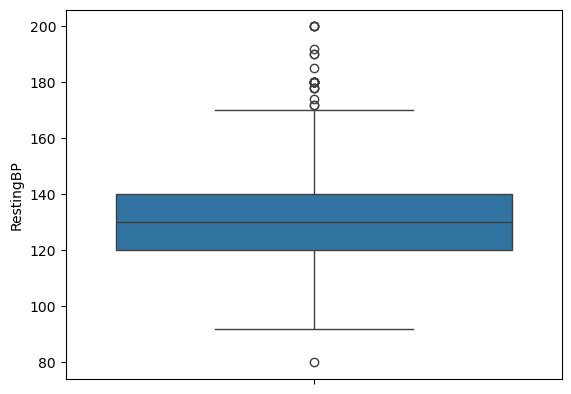

In [17]:
sns.boxplot(df['RestingBP'])

In [18]:
df[df['RestingBP']>170]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
123,58,F,ATA,180,393,0,Normal,110,Y,1.0,Flat,1
189,53,M,ASY,180,285,0,ST,120,Y,1.5,Flat,1
190,46,M,ASY,180,280,0,ST,120,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
274,45,F,ATA,180,295,0,Normal,180,N,0.0,Up,0
275,59,M,NAP,180,213,0,Normal,100,N,0.0,Up,0
278,57,F,ASY,180,347,0,ST,126,Y,0.8,Flat,0
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1
372,63,M,ASY,185,0,0,Normal,98,Y,0.0,Up,1


<Axes: ylabel='Cholesterol'>

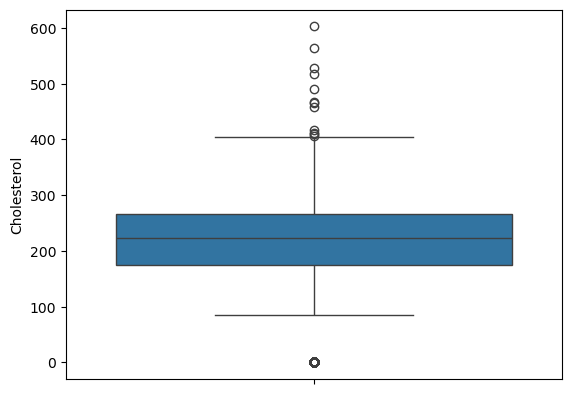

In [19]:
sns.boxplot(df['Cholesterol'])

In [20]:
df[df['Cholesterol']<1]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


There are many outliers in the cholesterol Feature

<Axes: ylabel='MaxHR'>

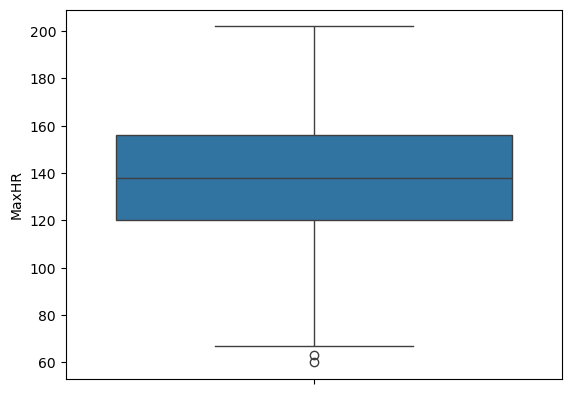

In [21]:
sns.boxplot(df['MaxHR'])

<Axes: ylabel='Oldpeak'>

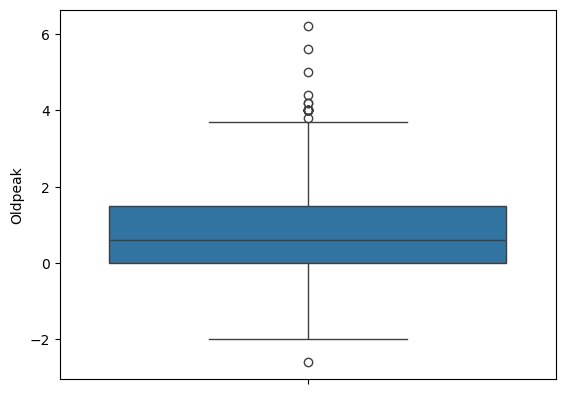

In [22]:
sns.boxplot(df['Oldpeak'])

<Axes: xlabel='Sex', ylabel='count'>

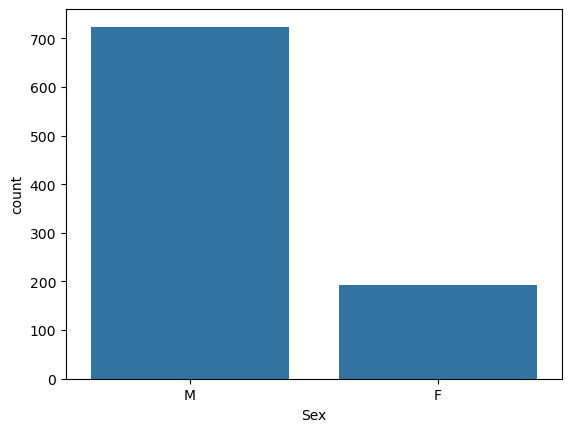

In [23]:
sns.countplot(x=df['Sex'])

In [24]:
df['Sex'].value_counts()

Sex
M    724
F    193
Name: count, dtype: int64

There are more males than females

<Axes: xlabel='ChestPainType', ylabel='count'>

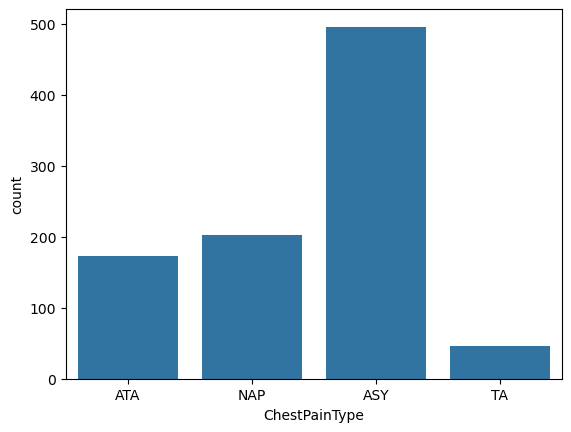

In [25]:
sns.countplot(x=df['ChestPainType'])

Highest type of chest pain is ASY and Lowest is TA

<Axes: xlabel='RestingECG', ylabel='count'>

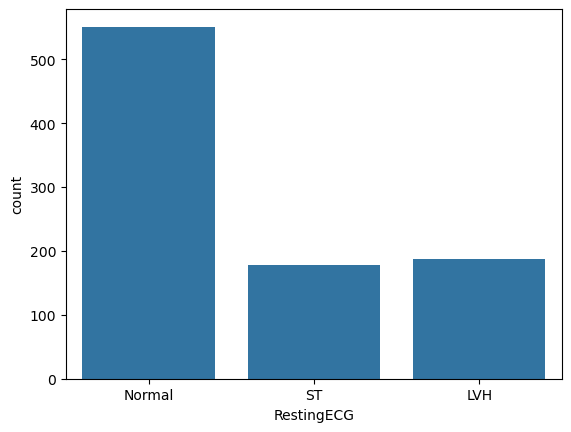

In [26]:
sns.countplot(x=df['RestingECG'])

Majority people have normal RestingECG

<Axes: xlabel='ExerciseAngina', ylabel='count'>

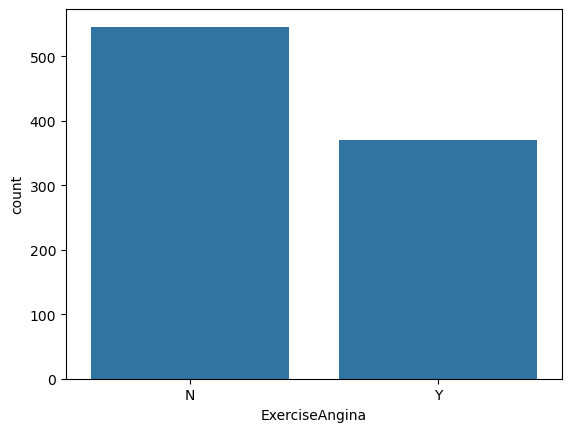

In [27]:
sns.countplot(x=df['ExerciseAngina'])

In [28]:
df['ExerciseAngina'].value_counts()

ExerciseAngina
N    546
Y    371
Name: count, dtype: int64

In [29]:
371/(546+371)*100

40.458015267175576

There are around 40% people with ExerciseAngina and 60% without it

In [30]:
df['HeartDisease'].value_counts()

HeartDisease
1    507
0    410
Name: count, dtype: int64

<Axes: xlabel='HeartDisease', ylabel='count'>

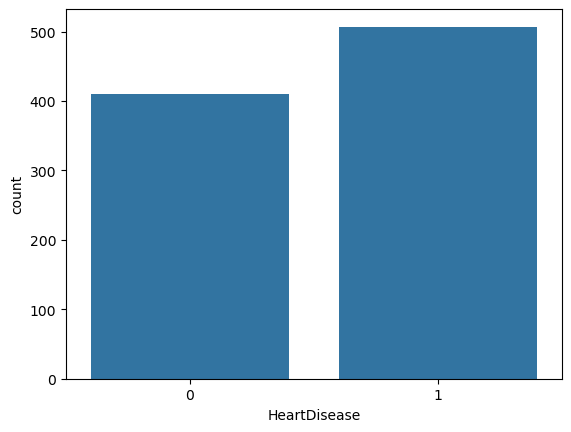

In [31]:
sns.countplot(x=df['HeartDisease'])

Dependent variable is almost Balance so there is no major requirement of Balancing

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
le=LabelEncoder()

In [34]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [35]:
df['Sex']=le.fit_transform(df['Sex'])

In [36]:
df['ChestPainType']=le.fit_transform(df['ChestPainType'])

In [37]:
df['RestingECG']=le.fit_transform(df['RestingECG'])

In [38]:
df['ExerciseAngina']=le.fit_transform(df['ExerciseAngina'])

In [39]:
df['ST_Slope']=le.fit_transform(df['ST_Slope'])

There is no ordinal data so we have used Label Encoding instead of Mapping

In [40]:
df.dtypes

Age                 int64
Sex                 int32
ChestPainType       int32
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int32
MaxHR               int64
ExerciseAngina      int32
Oldpeak           float64
ST_Slope            int32
HeartDisease        int64
dtype: object

In [41]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123,stratify=y)

# Model Selection

**1. As data is small and has Binary classes we will implement Logistic Regression**

**2. As data is small and linear we will implement SVM**

**3. There are 7 categorical columns so we will be implementing Decision Tree**

# Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
logi=LogisticRegression()

In [46]:
logi.fit(X_train,y_train)

c:\Users\aayus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
y_pred=logi.predict(X_test)

In [48]:
import joblib

joblib.dump(logi, 'HeartDisease_model.pkl')


['HeartDisease_model.pkl']

In [49]:
from sklearn.metrics import classification_report

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       123
           1       0.86      0.82      0.84       153

    accuracy                           0.83       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.83      0.83      0.83       276



[link text](https:// [link text](https:// [link text](https://)))# Naive Bayes

In [51]:
from sklearn.naive_bayes import GaussianNB

In [52]:
naiv=GaussianNB()

In [53]:
naiv.fit(X_train,y_train)

GaussianNB()

In [54]:
y_pred=naiv.predict(X_test)

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       123
           1       0.89      0.83      0.86       153

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276



# SVM

In [56]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

To get the best kernel for our dataset we will implement Hyper Parameter tuning using Grid search CV

In [57]:
svc=SVC()

In [58]:
param={'kernel':['linear','poly','rbf','sigmoid']}

In [59]:
gs=GridSearchCV(estimator=svc,param_grid=param,scoring='accuracy')

In [60]:
gs.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [61]:
gs.best_params_

{'kernel': 'linear'}

In [62]:
gs.best_estimator_.fit(X_train,y_train)

SVC(kernel='linear')

According to Hyper Parameter tuning Linear kernel is giving best result

In [63]:
y_pred_svm=gs.best_estimator_.predict(X_test)

In [64]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2


In [65]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       123
           1       0.87      0.86      0.86       153

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276



# Decision Tree

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
dt=DecisionTreeClassifier()

In [68]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [69]:
y_pred=dt.predict(X_test)

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       123
           1       0.81      0.81      0.81       153

    accuracy                           0.79       276
   macro avg       0.78      0.78      0.78       276
weighted avg       0.79      0.79      0.79       276

